Nisarg Patel  
CSC 578- NN and Deep Learning

Problem Statement : The task of the competition is to predict the temperature at the next hour given the weather conditions and temperature for prior hours.  This is a multivariate timeseries forecasting problem, and we use a neural network approach to tackle the problem.

In [18]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import keras
keras.__version__
pd.set_option('display.max_rows',50)

from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("C:/Users/nisar/OneDrive/Desktop/Depaul/CSC-578_NN_and_DeepLearning/Final Project/climate_hour.csv")

In [3]:
dataset.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
dataset.shape

(70037, 15)

In [35]:
submission = pd.read_csv('C:/Users/nisar/OneDrive/Desktop/Depaul/CSC-578_NN_and_DeepLearning/Final Project/sample_submission.csv')
submission = submission['date_time']

In [36]:
data_dir = 'C:/Users/nisar/OneDrive/Desktop/Depaul/CSC-578_NN_and_DeepLearning/Final Project/'
fname = os.path.join(data_dir, 'climate_hour.csv')

f = open(fname)
data = f.read()
f.close()

In [37]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
70038


In [38]:
del lines[70037]

In [39]:
import numpy as np

# Parse the data
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
print(float_data.shape)

(70037, 14)


In [40]:
float_data

array([[ 9.96500e+02, -8.05000e+00,  2.65380e+02, ...,  2.10000e-01,
         6.30000e-01,  1.92700e+02],
       [ 9.96620e+02, -8.88000e+00,  2.64540e+02, ...,  2.50000e-01,
         6.30000e-01,  1.90300e+02],
       [ 9.96840e+02, -8.81000e+00,  2.64590e+02, ...,  1.80000e-01,
         6.30000e-01,  1.67200e+02],
       ...,
       [ 1.00070e+03, -2.59000e+00,  2.70510e+02, ...,  3.80000e-01,
         7.20000e-01,  8.15000e+00],
       [ 1.00021e+03, -3.76000e+00,  2.69390e+02, ...,  8.90000e-01,
         1.30000e+00,  2.23700e+02],
       [ 9.99820e+02, -4.82000e+00,  2.68360e+02, ...,  1.23000e+00,
         1.96000e+00,  1.84900e+02]])

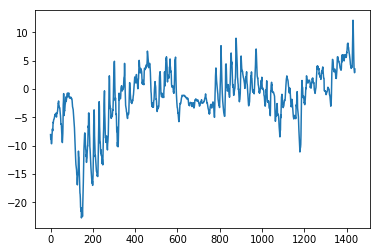

In [41]:
temp = float_data[:, 1]
plt.plot(range(1440), temp[:1440]);

In [42]:
float_data[0:2]

array([[ 9.96500e+02, -8.05000e+00,  2.65380e+02, -8.78000e+00,
         9.44000e+01,  3.33000e+00,  3.14000e+00,  1.90000e-01,
         1.96000e+00,  3.15000e+00,  1.30786e+03,  2.10000e-01,
         6.30000e-01,  1.92700e+02],
       [ 9.96620e+02, -8.88000e+00,  2.64540e+02, -9.77000e+00,
         9.32000e+01,  3.12000e+00,  2.90000e+00,  2.10000e-01,
         1.81000e+00,  2.91000e+00,  1.31225e+03,  2.50000e-01,
         6.30000e-01,  1.90300e+02]])

In [43]:
dataset[dataset['Date Time']=='31.12.2014 22:00:00'] # to find the index for split

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
52564,31.12.2014 22:00:00,1006.92,1.94,274.56,1.75,98.6,7.03,6.93,0.1,4.29,6.88,1271.74,0.71,1.8,129.6


In [44]:
def series_to_supervised(mat,lookback,future_step=1):
    '''
    Convert a timeseries as a supervised learning dataset.
    References:
    https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    Arguments:
        mat: [np.ndarray] a numpy nd array object with values in float format
        lookback: [int] number of timeframes to look back in past (t-n,...,t-1). This does not include current time frame (t)
                E.g. to look 24 hours data including current time-stamp, this value should be 23 (t-23,..,t-1 and t(covered in future_step)).
        future_step: [int] number of timeframes to look in future (t,t+1,..,t+n). This includes the current time frame (t).
                E.g. to look 1 timeframe ahead in future, the value should be 2 (t and t+1).        
    Returns:
        A pandas data frame with timeseries framed for supervised learning.
    '''
    
    n_vars = mat.shape[-1]
    df = pd.DataFrame(mat)

    cols,names = list(),list()
    #create input sequence (t-n,....,t-1)
    for i in range(lookback,0,-1):
        cols.append(df.shift(i))
        names+=[('var%d(t-%d)'%(j+1,i)) for j in range(n_vars)]
    #create forecast sequence (t,t+1,..,t+n)
    for i in range(0,future_step):
        cols.append(df.shift(-i))
        if i==0:
            names+=[('var%d(t)'%(j+1)) for j in range(n_vars)]
        else:
            names+=[('var%d(t+%d)'%(j+1,i)) for j in range(n_vars)]
    #concatenate all columns
    agg = pd.concat(cols,axis=1)
    agg.columns = names
    #drop nulls
    agg.dropna(inplace=True)
    return agg

## Dividing the data into training and testing 
we will split the data from 01.01.2009 01:00:00  to 31.12.2014 22:00:00 into traing data and 31.12.2014 00:00:00 to 1.12.2016 23:00:00 into testing data

In [45]:
lookback = 23
future_step = 2

#create train_data
train = series_to_supervised(float_data[:52564+future_step],23,2)
# Seperate the samples and target variables
x_train = train.iloc[:,:336]
y_train = train.iloc[:,337]

#create test_data
test = series_to_supervised(float_data[52565-lookback:],lookback,future_step)

# Seperate the samples and target variables
x_test = test.iloc[:,:336]
y_test = test.iloc[:,337]

### Normalize the data

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

### Converting the 2-D data into 3-D

In [47]:
from sklearn.model_selection import train_test_split
x_train_norm, x_val_norm, y_train, y_val=train_test_split(x_train_norm,y_train,test_size=0.25,random_state=10)

In [48]:
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0],24,14)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0],24,14)
x_val_norm = x_val_norm.reshape(x_val_norm.shape[0],24,14)
y_train = y_train.values
y_val = y_val.values

In [49]:
print('Shape:',x_train_norm.shape, 'Type:', x_train_norm.view)
print('Shape:',x_test_norm.shape, 'Type:', x_test_norm.view)
print('Shape:',x_val_norm.shape, 'Type:', x_val_norm.view)
print('Shape:',y_train.shape, 'Type:', y_train.view)
print('Shape:',y_val.shape, 'Type:', y_val.view)

Shape: (39406, 24, 14) Type: <built-in method view of numpy.ndarray object at 0x000002C4A18DD4E0>
Shape: (17471, 24, 14) Type: <built-in method view of numpy.ndarray object at 0x000002C49F4AD080>
Shape: (13136, 24, 14) Type: <built-in method view of numpy.ndarray object at 0x000002C49F4AD800>
Shape: (39406,) Type: <built-in method view of numpy.ndarray object at 0x000002C49F912B20>
Shape: (13136,) Type: <built-in method view of numpy.ndarray object at 0x000002C4A04B2E40>


### Building baseline model using 1 layer of LSTM

In [50]:
import time
from math import sqrt
from pandas import DataFrame
from pandas import concat

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.layers import Embedding
from keras.layers import LSTM, GRU
from keras.layers import concatenate
from keras.layers import Bidirectional
from keras import optimizers

In [51]:
adam = keras.optimizers.Adam(lr = 0.001,decay=0.001)

In [52]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(64,return_sequences=True,
                              input_shape = (x_train_norm.shape[1],x_train_norm.shape[2]))))
model1.add(Dropout(0.2))
model1.add(LSTM(64,return_sequences=False))
model1.add(Dense(1))
model1.compile(loss='mae',optimizer='adam')

In [64]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 24, 128)           40448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 89,921
Trainable params: 89,921
Non-trainable params: 0
_________________________________________________________________


In [53]:
history1 = model1.fit(x_train_norm, y_train, batch_size=32, epochs = 30,validation_data=(x_val_norm,y_val), verbose = 2)

Train on 39406 samples, validate on 13136 samples
Epoch 1/30
 - 56s - loss: 1.7101 - val_loss: 0.6944
Epoch 2/30
 - 52s - loss: 0.7590 - val_loss: 0.7251
Epoch 3/30
 - 49s - loss: 0.6921 - val_loss: 0.5754
Epoch 4/30
 - 49s - loss: 0.6625 - val_loss: 0.6070
Epoch 5/30
 - 49s - loss: 0.6270 - val_loss: 0.5665
Epoch 6/30
 - 52s - loss: 0.6013 - val_loss: 0.5376
Epoch 7/30
 - 49s - loss: 0.5928 - val_loss: 0.5404
Epoch 8/30
 - 49s - loss: 0.5765 - val_loss: 0.5230
Epoch 9/30
 - 49s - loss: 0.5680 - val_loss: 0.5211
Epoch 10/30
 - 49s - loss: 0.5548 - val_loss: 0.5582
Epoch 11/30
 - 49s - loss: 0.5548 - val_loss: 0.5175
Epoch 12/30
 - 49s - loss: 0.5588 - val_loss: 0.5266
Epoch 13/30
 - 49s - loss: 0.5419 - val_loss: 0.5107
Epoch 14/30
 - 49s - loss: 0.5425 - val_loss: 0.4915
Epoch 15/30
 - 49s - loss: 0.5391 - val_loss: 0.4828
Epoch 16/30
 - 49s - loss: 0.5354 - val_loss: 0.4894
Epoch 17/30
 - 49s - loss: 0.5352 - val_loss: 0.4806
Epoch 18/30
 - 49s - loss: 0.5290 - val_loss: 0.5013
Epoch

In [56]:
def plot_history(model_eval):
    pyplot.plot(model_eval.history['loss'], label='train')
    pyplot.plot(model_eval.history['val_loss'], label='test')
    pyplot.xlabel("Epochs")
    pyplot.ylabel("Loss")
    pyplot.legend()
    pyplot.show()

In [55]:
pred3 = model1.predict(x_test_norm)

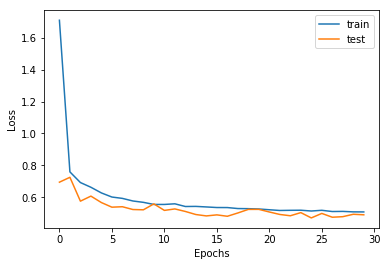

In [58]:
plot_history(history1)

In [60]:
columns_new = ['temperature']
predict1 = pd.DataFrame(pred3, columns=columns_new)

In [ ]:
frames = [submission,ypred]
submission1 = pd.concat([submission,ypred], axis=1)

In [61]:
submission1 = pd.concat([submission,predict1], axis=1)
submission1.to_csv('submission1@1112.csv', index= False)

In [ ]:
'''test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse) '''

### Model 2

In [70]:
model3 = Sequential()
model3.add(LSTM(50,
               input_shape=(x_train_norm.shape[1],x_train_norm.shape[2]),
               return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(128, return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(64, return_sequences=False))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation="relu"))
model3.compile(loss="mae", optimizer='adam')
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 24, 50)            13000     
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 24, 128)           91648     
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total para

In [71]:
start = time.time()
history3 = model3.fit(x_train_norm,y_train, batch_size = 32,
                      epochs=20, validation_split = 0.30, verbose = 2)
print("---> Compilation Time : ", time.time() - start)

Train on 27584 samples, validate on 11822 samples
Epoch 1/20
 - 54s - loss: 4.6131 - val_loss: 2.0430
Epoch 2/20
 - 52s - loss: 2.0458 - val_loss: 1.4363
Epoch 3/20
 - 55s - loss: 1.7298 - val_loss: 1.4397
Epoch 4/20
 - 54s - loss: 1.6228 - val_loss: 1.1700
Epoch 5/20
 - 55s - loss: 1.5516 - val_loss: 1.2156
Epoch 6/20
 - 57s - loss: 1.5238 - val_loss: 1.1877
Epoch 7/20
 - 62s - loss: 1.5000 - val_loss: 1.1027
Epoch 8/20
 - 55s - loss: 1.4746 - val_loss: 1.1319
Epoch 9/20
 - 55s - loss: 1.4553 - val_loss: 1.0848
Epoch 10/20
 - 56s - loss: 1.4514 - val_loss: 1.1398
Epoch 11/20
 - 62s - loss: 1.4507 - val_loss: 1.1182
Epoch 12/20
 - 61s - loss: 1.4461 - val_loss: 1.1244
Epoch 13/20
 - 59s - loss: 1.4268 - val_loss: 1.0908
Epoch 14/20
 - 51s - loss: 1.4220 - val_loss: 1.0934
Epoch 15/20
 - 54s - loss: 1.4194 - val_loss: 1.0464
Epoch 16/20
 - 53s - loss: 1.3952 - val_loss: 1.0666
Epoch 17/20
 - 52s - loss: 1.3988 - val_loss: 1.1670
Epoch 18/20
 - 51s - loss: 1.3924 - val_loss: 1.0691
Epoch

In [72]:
pred4 = model3.predict(x_test_norm)

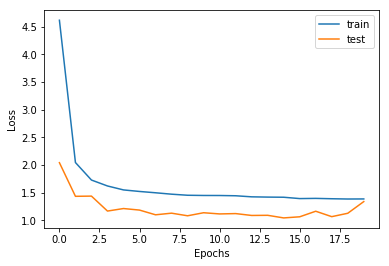

In [73]:
plot_history(history3)

In [76]:
columns_new = ['temperature']
predict2 = pd.DataFrame(pred4, columns=columns_new)
submission2 = pd.concat([submission,predict2], axis=1)

In [77]:
submission2.to_csv('submission2.csv', index= False)